In [2]:
# READ DATA
import pandas as pd
dfs = pd.read_excel('OnlineRetail.xlsx', sheet_name='OnlineRetail')

In [3]:
#UNIQUE Values 
#exploring the unique values of each attribute
print("Number of transactions: ", dfs['InvoiceNo'].nunique())
print("Number of products bought: ",dfs['StockCode'].nunique())
print("Number of customers:", dfs['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(dfs['CustomerID'].isnull().sum() * 100 / len(dfs),2),"%" )
print('Number of countries: ',dfs['Country'].nunique())



('Number of transactions: ', 25900)
('Number of products bought: ', 4070)
('Number of customers:', 4372)
('Percentage of customers NA: ', 24.0, '%')
('Number of countries: ', 38)


In [4]:
#######--------------------------------------------------------------------------------------------------------------#####
# Cancelled invoices

# As mentioned in the description of the dataset, some InvoiceNo start with the letter "c" = cancelled. Let's see if our hypothesis is correct about the negative quantity: -80995.
# We will look for the list of cancelled invoices and check if there is an invoice with that quantity.


In [5]:
#get canceled transactions
cancelled_orders = dfs[dfs['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.head()

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom  
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom  
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom

In [6]:
# How many canceled orders do we have?

In [7]:
#check how many rows our dataframe of cancelled orders contain
print("We have ",len(cancelled_orders), " cancelled orders.")
#percentage of cancelled orders in total orders
total_orders = dfs['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

('We have ', 9288, ' cancelled orders.')
Percentage of orders canceled: 9288/25900 (0.00%) 


In [8]:
#remove canceled orders
dfs = dfs[dfs['Quantity']>0]
dfs.shape

(531285, 8)

In [9]:
#remove rows where customerID are NA
dfs.dropna(subset=['CustomerID'],how='all',inplace=True)
dfs.shape

(397924, 8)

In [10]:
###### Multiplying Quantity and UnitPrice columns to get a new column : AmountSpend########
dfs['AmountSpend'] = dfs['Quantity']*dfs['UnitPrice']

In [11]:
dfs.tail(5)

InvoiceNo StockCode                      Description  Quantity  \
541904    581587     22613      PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899     CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254    CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255  CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138    BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID Country  AmountSpend  
541904 2011-12-09 12:50:00       0.85     12680.0  France        10.20  
541905 2011-12-09 12:50:00       2.10     12680.0  France        12.60  
541906 2011-12-09 12:50:00       4.15     12680.0  France        16.60  
541907 2011-12-09 12:50:00       4.15     12680.0  France        16.60  
541908 2011-12-09 12:50:00       4.95     12680.0  France        14.85

In [12]:
#### Check if there is a negative AmountSpend in the filtered database
#  len(DataFrame.index) is equal to number of rows
negative_amountSpend = dfs[dfs['AmountSpend'] < 0]
len(negative_amountSpend.index)

0

In [13]:
###  Here we can see that there is no negative amount spend
## now to think about how to create User, Item matrix 
## My approach is to consider how much money did each User spent on each Item
## 


In [14]:
## Keeping relevant coluns from the Database
matrix_setup = dfs[['StockCode','CustomerID','AmountSpend']]
matrix_setup.shape

(397924, 3)

In [20]:
matrix_setup.describe()

CustomerID    AmountSpend
count  397924.000000  397924.000000
mean    15294.315171      22.394749
std      1713.169877     309.055588
min     12346.000000       0.000000
25%     13969.000000       4.680000
50%     15159.000000      11.800000
75%     16795.000000      19.800000
max     18287.000000  168469.600000

In [17]:
#UNIQUE Values 
#exploring the unique values of each attribute

print("Number of products bought: ",matrix_setup['StockCode'].nunique())
print("Number of customers:", matrix_setup['CustomerID'].nunique() )



('Number of products bought: ', 3665)
('Number of customers:', 4339)


In [20]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]

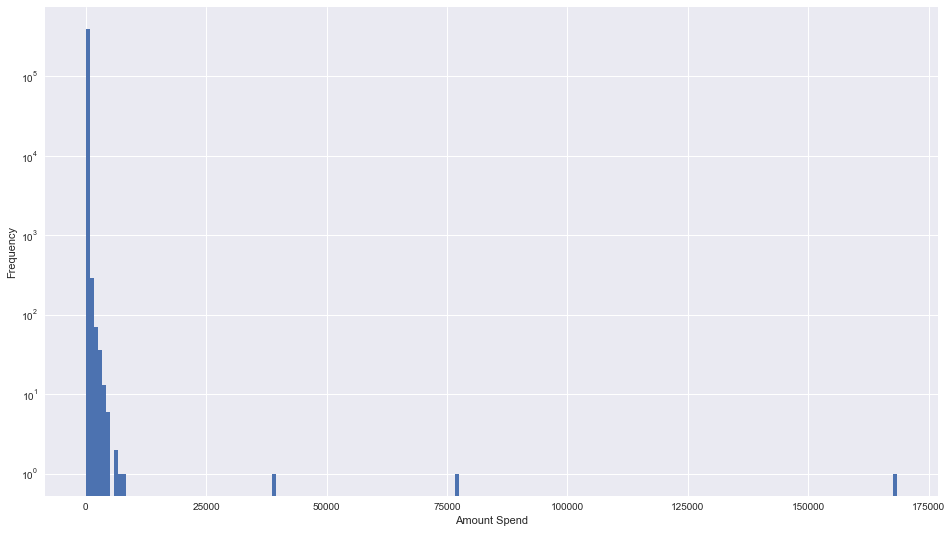

In [21]:
#plt.plot(a['CustomerID'])
import seaborn as sns
sns.set()
plt.hist(matrix_setup['AmountSpend'],bins=200, log=True)
plt.xlabel('Amount Spend')
plt.ylabel('Frequency')
plt.show()

In [22]:
# finding outliers
matrix_setup[(matrix_setup['AmountSpend'] > 5000)].count()

StockCode      7
CustomerID     7
AmountSpend    7
dtype: int64

In [23]:
# removing outliers
matrix_setup = matrix_setup[(matrix_setup['AmountSpend'] < 5000)]

In [24]:
#UNIQUE Values 
#exploring the unique values of each attribute

print("Number of products bought: ",matrix_setup['StockCode'].nunique())
print("Number of customers:", matrix_setup['CustomerID'].nunique() )


('Number of products bought: ', 3664)
('Number of customers:', 4338)


In [25]:
import numpy as np
matrix_setup['Mean_amount'] = matrix_setup.groupby(['StockCode','CustomerID'])['AmountSpend'].transform(np.mean)

In [26]:
#matrix_setup.groupby(['StockCode' =' 85123A','CustomerID' =' 17850.0'])
matrix_setup.loc[(matrix_setup['StockCode'] == '85123A') & (matrix_setup['CustomerID'] == 17850.0)]

StockCode  CustomerID  AmountSpend  Mean_amount
0       85123A     17850.0         15.3    18.582353
49      85123A     17850.0         15.3    18.582353
66      85123A     17850.0         15.3    18.582353
278     85123A     17850.0         15.3    18.582353
416     85123A     17850.0         20.4    18.582353
3118    85123A     17850.0         15.3    18.582353
3142    85123A     17850.0         15.3    18.582353
3192    85123A     17850.0         15.3    18.582353
3224    85123A     17850.0         15.3    18.582353
3425    85123A     17850.0         15.3    18.582353
3443    85123A     17850.0         15.3    18.582353
3808    85123A     17850.0         30.6    18.582353
3823    85123A     17850.0         15.3    18.582353
4161    85123A     17850.0         30.6    18.582353
4182    85123A     17850.0         15.3    18.582353
4510    85123A     17850.0         15.3    18.582353
4526    85123A     17850.0         35.4    18.582353

In [27]:
# DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)[source]
mtarix_toGO = matrix_setup.drop_duplicates(subset = ['StockCode','CustomerID'], keep = 'first')

In [28]:
mtarix_toGO.loc[(matrix_setup['StockCode'] == '85123A') & (matrix_setup['CustomerID'] == 17850.0)]

StockCode  CustomerID  AmountSpend  Mean_amount
0    85123A     17850.0         15.3    18.582353

In [29]:
# Unique transactions = length of any column
mtarix_toGO.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266798 entries, 0 to 541908
Data columns (total 4 columns):
StockCode      266798 non-null object
CustomerID     266798 non-null float64
AmountSpend    266798 non-null float64
Mean_amount    266798 non-null float64
dtypes: float64(3), object(1)
memory usage: 9.2+ MB


In [31]:
#The name SurPRISE (roughly :) ) stands for Simple Python RecommendatIon System Engine.
from surprise import SVD,NMF,SVDpp,evaluate
from surprise.dataset import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate
from surprise.dataset import DatasetAutoFolds

In [32]:
from surprise.model_selection.search import GridSearchCV

In [33]:
# need to normalize the Mean_Amount column(which is going to be predicted) otherwise prediction takes a lot of time and also bad results
import numpy as np
std_mean_amt = np.std(mtarix_toGO['Mean_amount'])
mean = np.mean(mtarix_toGO['Mean_amount'])
print std_mean_amt
print mean

52.2241310018
18.3891753166


In [34]:
# Normalized data [0,1]
mtarix_toGO['Norm_Tot_Amnt']= (mtarix_toGO['Mean_amount'] -mean)/std_mean_amt

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
lower_bound = min(mtarix_toGO['Norm_Tot_Amnt'])
upper_bound = max(mtarix_toGO['Norm_Tot_Amnt'])
print lower_bound
print upper_bound

-0.352120273977
91.114217382


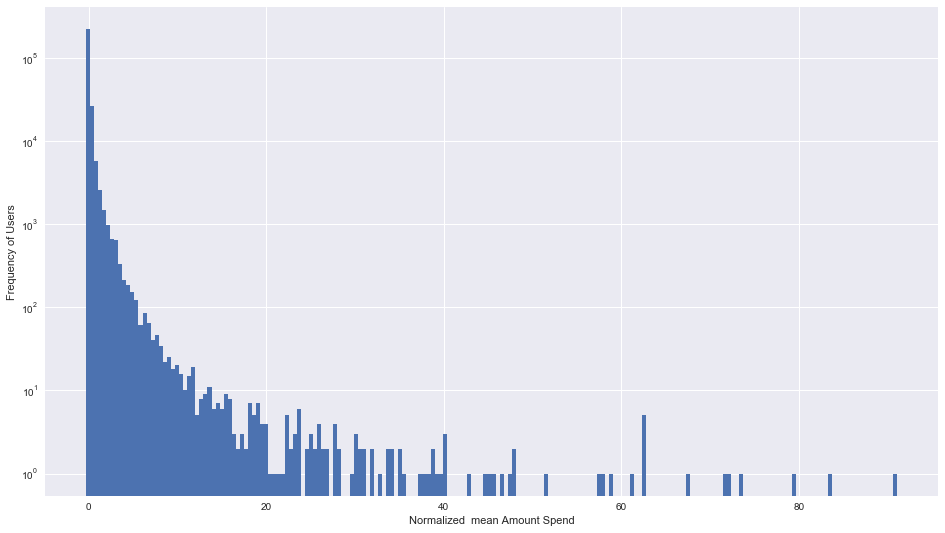

In [37]:
sns.set()
plt.hist(mtarix_toGO['Norm_Tot_Amnt'],bins=200, log=True)
plt.xlabel('Normalized  mean Amount Spend')
plt.ylabel('Frequency of Users')
plt.show()

In [36]:
#define the reader  with  upper and lower bounds , also now we are predicting Normalized Total Amount column
reader = Reader(rating_scale = (lower_bound,upper_bound))
#rating_scale(:obj:`tuple`, optional): The rating scale used for every rating.  Default is ``(1, 5)``.

# Assigning data as matrix_setup
data = Dataset.load_from_df(df=mtarix_toGO[['CustomerID','StockCode','Norm_Tot_Amnt']],reader=reader)
#data = Dataset.load_from_df(df=matrix_setup[['CustomerID','StockCode','AmountSpend']],reader=None)

In [39]:
# check out time
import time
start_time = time.time()

In [40]:
#### 12th July## 1st Try SVD Grid Search
# GridSerachCv implementation 
param_grid = {'n_factors':[2,5,10,50],'n_epochs': [10,50,100,500], 'lr_all': [0.1,0.01,0.001,0.0001],'reg_all': [0.1,0.01,0.001,0.0001]}
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=1)

gs.fit(data)
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

# best MAE score
print(gs.best_score['mae'])

# combination of parameters that gave the best MAE score
print(gs.best_params['mae'])

print("--- %s seconds ---" % (time.time() - start_time))

0.7927069640117089
{'lr_all': 0.01, 'reg_all': 0.1, 'n_factors': 50, 'n_epochs': 500}
0.1697763490094165
{'lr_all': 0.01, 'reg_all': 0.1, 'n_factors': 50, 'n_epochs': 500}
--- 145926.787 seconds ---


In [42]:
#12th July## 1st Try SVD
results_df = pd.DataFrame.from_dict(gs.cv_results)
results_df

mean_fit_time  mean_test_mae  mean_test_rmse  mean_test_time  \
0         6.976667      91.114217       91.119705        0.710333   
1        37.345000      91.114217       91.119705        0.639667   
2        74.766333      91.114217       91.119705        0.655333   
3       377.227000      91.114217       91.119705        0.676000   
4        12.511667      91.114217       91.119705        0.686667   
5        69.098333      91.114217       91.119705        0.686667   
6       140.084000      91.114217       91.119705        0.681000   
7       701.759667      91.114217       91.119705        0.676333   
8        23.399667      91.114217       91.119705        0.702000   
9       122.565000      91.114217       91.119705        0.676333   
10      248.058000      91.114217       91.119705        0.676333   
11     1246.845333      91.114217       91.119705        0.723000   
12      109.445000      91.114217       91.119705        0.676333   
13      563.537667      91.114217       91.119705        0.780333   
14     1123.642333      91.114217       91.119705        0.712667   
15     5610.540000      91.114217       91.119705        0.686333   
16        6.942333      91.114217       91.119705        0.649667   
17       37.211333      91.114217       91.119705        0.666000   
18       75.125333      91.114217       91.119705        0.634333   
19      377.664000      91.114217       91.119705        0.665667   
20       13.270667      91.114217       91.119705        0.676000   
21       69.769000      91.114217       91.119705        0.676000   
22      140.432333      91.114217       91.119705        0.712333   
23      703.697000      91.114217       91.119705        0.676000   
24       24.362000      91.114217       91.119705        0.681333   
25      124.234333      91.114217       91.119705        0.670667   
26      249.177667      91.114217       91.119705        0.707000   
27     1248.704000      91.114217       91.119705        0.670667   
28      109.757333      91.114217       91.119705        0.712000   
29      559.988333      91.114217       91.119705        0.717333   
..             ...            ...             ...             ...   
226      10.502667       0.207443        0.880398        0.711000   
227      53.436000       0.193550        0.831650        0.687000   
228       1.191000       0.258751        0.968260        0.735000   
229       5.923333       0.224210        0.911442        0.693667   
230      11.854333       0.208277        0.880648        0.705667   
231      59.226000       0.194910        0.839580        0.730667   
232       1.465667       0.259557        0.968656        0.709000   
233       7.313667       0.225137        0.911469        0.699667   
234      14.615667       0.209594        0.880920        0.701333   
235      73.174667       0.195781        0.835844        0.735000   
236       3.378333       0.265941        0.970500        0.701667   
237      16.830667       0.232629        0.913792        0.706333   
238      33.606000       0.218587        0.883372        0.702000   
239     168.455000       0.205006        0.838234        0.703333   
240       1.052333       0.258288        0.968143        0.708667   
241       5.236333       0.223418        0.911112        0.668333   
242      10.485667       0.207487        0.880444        0.722667   
243      52.487000       0.193693        0.842902        0.669667   
244       1.185667       0.258799        0.968335        0.696333   
245       5.929667       0.224153        0.911341        0.726667   
246      11.837667       0.208222        0.880758        0.693333   
247      59.188333       0.194729        0.834113        0.728333   
248       1.462000       0.259535        0.968520        0.702333   
249       7.301333       0.225111        0.911674        0.701000   
250      14.610333       0.209506        0.880928        0.699667   
251      73.057000       0.195733        0.833500        0.731333   
252

In [ ]:
#scatter plot

In [135]:
#Train using best hyper parameters i.e. {'lr_all': 0.01, 'reg_all': 0.1, 'n_factors': 50, 'n_epochs': 500}
algo = SVD(lr_all=0.01, reg_all= 0.1, n_factors=50, n_epochs=100)

In [136]:
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=.25)

In [137]:
# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)

In [138]:
# Predictions
predictions = algo.test(testset)

In [139]:
# Then compute RMSE
from surprise import accuracy
accuracy.rmse(predictions)

RMSE: 0.8022


0.8022391385491833

In [140]:
test_list = []
for i in testset:
    test_list.append(i[-1])

In [141]:
prediction_list = []
for i in predictions:
    prediction_list.append(i[3])

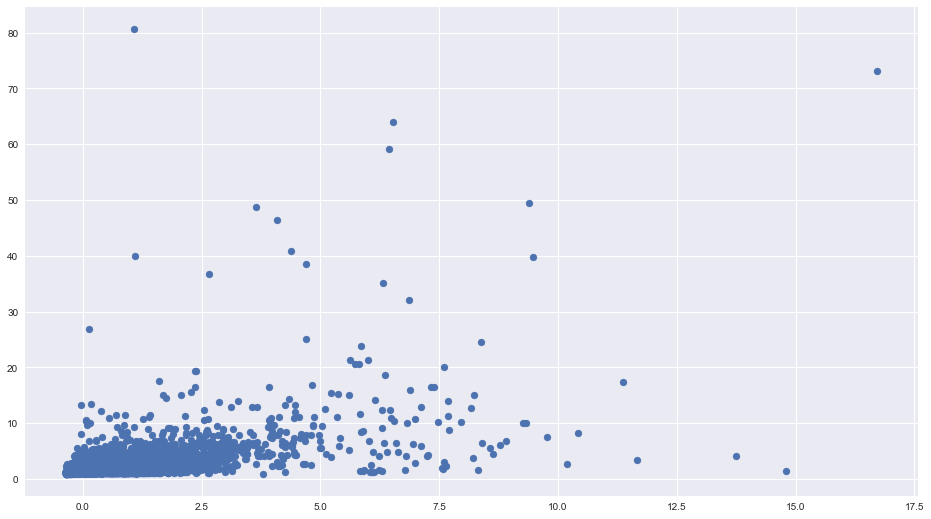

In [142]:
plt.scatter(prediction_list,test_list)

Text(0,0.5,u'Amount Spent')

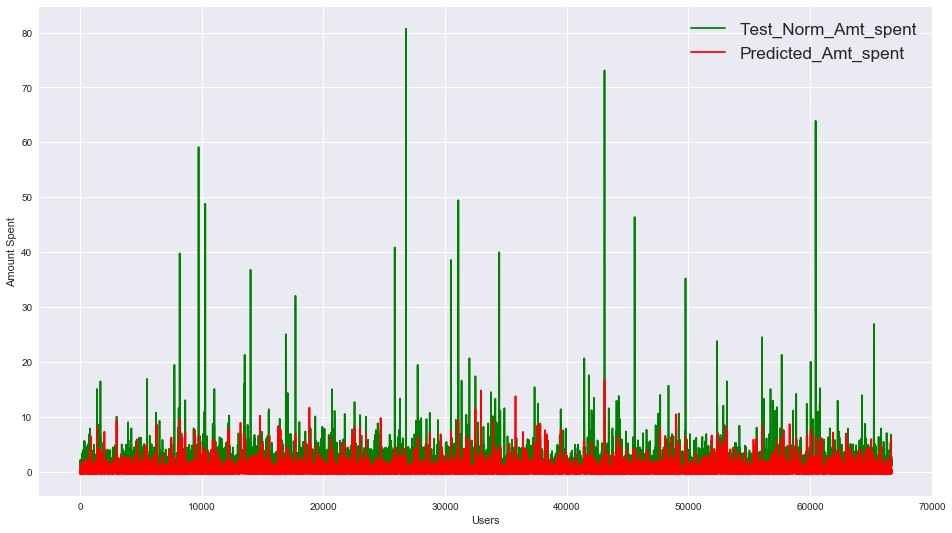

In [143]:
plt.plot(test_list,'g',label='Test_Norm_Amt_spent')
plt.plot(prediction_list,'r',label='Predicted_Amt_spent')
legend = plt.legend(loc='best', shadow=True, fontsize='x-large')
#legend.get_frame().set_facecolor('#00FFCC')
plt.xlabel('Users')
plt.ylabel('Amount Spent')

In [144]:
len(testset)

66700

In [146]:
data.raw_ratings[:9]

[(17850.0, u'85123A', 1.3558192847772361, None),
 (17850.0, 71053, 1.4658427977150026, None),
 (17850.0, u'84406B', 1.3791350783666279, None),
 (17850.0, u'84029G', 1.4200221946610678, None),
 (17850.0, u'84029E', 1.3971118931341004, None),
 (17850.0, 22752, 1.3845205198206991, None),
 (17850.0, 21730, 1.4978541433097132, None),
 (17850.0, 22633, 1.2250480946454314, None),
 (17850.0, 22632, 1.2250480946454314, None)]

In [148]:
#data.df

In [132]:
testset_list = []
for i in testset:
    testset_list.append(i[2])

In [133]:
max(testset_list)

85.03203491979524

In [134]:
min(testset_list)

1.0019148236281143

In [150]:
trainset.raw_ratings

AttributeError: Trainset instance has no attribute 'raw_ratings'

In [152]:
trainset.ur

defaultdict(list,
            {0: [(0, 1.1627600083897138),
              (83, 2.0052824047599977),
              (133, 1.3159458986388564),
              (47, 1.3159458986388564),
              (1393, 1.0651040033558856),
              (1428, 1.095741181405714),
              (963, 1.1129745940587426),
              (1397, 1.4787059070285704),
              (1090, 1.0315945898638856),
              (1231, 1.4787059070285704),
              (741, 1.1541433020631997),
              (332, 1.252756718911085),
              (238, 1.0277649426076572),
              (1897, 1.1522284784350854),
              (170, 1.221353611410011),
              (685, 1.228342717652628),
              (982, 1.0560085911223427),
              (135, 1.1627600083897138),
              (546, 1.244140012584571),
              (354, 1.1665896556459425),
              (416, 1.3044569568701707),
              (224, 1.0402112961904),
              (904, 1.1493562429929138),
              (886, 1.0162760008389715),
 